In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv('F:/DataSets/cars.csv', na_values=['',' ','na','NA'])

In [5]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
mpg             261 non-null float64
 cylinders      261 non-null int64
 cubicinches    259 non-null float64
 hp             261 non-null int64
 weightlbs      258 non-null float64
 time-to-60     261 non-null int64
 year           261 non-null int64
 brand          261 non-null object
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


In [7]:
df.isna().sum()

mpg             0
 cylinders      0
 cubicinches    2
 hp             0
 weightlbs      3
 time-to-60     0
 year           0
 brand          0
dtype: int64

In [8]:
df.shape

(261, 8)

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

mpg             0
 cylinders      0
 cubicinches    0
 hp             0
 weightlbs      0
 time-to-60     0
 year           0
 brand          0
dtype: int64

In [11]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.


<h2>Feature Engeneering</h2>

<p><b>It only work in only on numerical data</p>

In [12]:
df['age'] = 2019 - df[' year']

In [13]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand,age
0,14.0,8,350.0,165,4209.0,12,1972,US.,47
1,31.9,4,89.0,71,1925.0,14,1980,Europe.,39
2,17.0,8,302.0,140,3449.0,11,1971,US.,48
3,15.0,8,400.0,150,3761.0,10,1971,US.,48
4,30.5,4,98.0,63,2051.0,17,1978,US.,41


In [14]:
df.drop([' year', ' brand'], axis=1, inplace=True)

In [15]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,age
0,14.0,8,350.0,165,4209.0,12,47
1,31.9,4,89.0,71,1925.0,14,39
2,17.0,8,302.0,140,3449.0,11,48
3,15.0,8,400.0,150,3761.0,10,48
4,30.5,4,98.0,63,2051.0,17,41


<h2>Check the Outliers or not</h2>

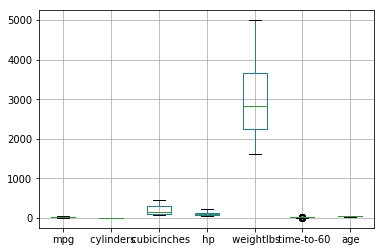

In [16]:
 df.boxplot()

<p><b>more then 95 percentile and less then 5 percentile.<br> --> more the 95 percentile will be Cliped at 95 percentile value.<br>--> less then 5 percentile will be Cliped at 5 percentile value</p>

In [22]:
lower = df.quantile(0.05)
upper = df.quantile(0.95)

outlier_upside = (df > upper) 
outlier_lowerside = (df < lower)

#Mask the outlier into the dataframe
df = df.mask(outlier_lowerside, lower, axis=1)
df = df.mask(outlier_upside, upper, axis=1)

<p><b>Normalise the data frame because<br>
-->mpg in tens<br>
-->cylinders in once<br>
-->cubicinches in hundreds<br>
-->hp in hundreds<br>
-->weightlbs in thousent<br>
-->time-to-60 in tens<br>
    -->age in tens</b><br>

<h4>So we have to normalize the data because every column is in the diffrent units</h4></p>

In [26]:
df_norm = (df-df.min())/(df.max() - df.min())

In [27]:
df_norm.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,age
0,0.040984,1.0,0.841270,0.857143,0.901915,0.108108,0.916667
1,0.774590,0.0,0.012698,0.089796,0.004909,0.324324,0.250000
2,0.163934,1.0,0.688889,0.653061,0.603436,0.000000,1.000000
3,0.081967,1.0,1.000000,0.734694,0.725970,0.000000,1.000000
4,0.717213,0.0,0.041270,0.024490,0.054394,0.648649,0.416667


In [28]:
from sklearn.cluster import KMeansMeans

In [29]:
kmeans = KMeans(n_clusters=3)#n_clusters=3 means k=3
kmeans.fit(df_normnorm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
kmeans.cluster_centers_

array([[0.08477431, 1.        , 0.83239835, 0.78652502, 0.83855388,
        0.18955942, 0.68150685],
       [0.65160682, 0.00198413, 0.07357017, 0.14927114, 0.15504438,
        0.61218361, 0.4265873 ],
       [0.29997124, 0.50877193, 0.41481481, 0.34113856, 0.50244856,
        0.56472262, 0.49415205]])

In [31]:
kmeans.inertia_ #mean with in cluster system

50.46045333294878

In [32]:
kmeans.labels_

array([0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2,
       0, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2, 2, 0, 1, 0,
       1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 1, 1, 0, 2, 1, 2, 1, 0, 2, 1, 1, 1,
       0, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0,
       1, 1, 2, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 0, 0, 1, 1, 0, 2, 1, 2, 1,
       1, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 0, 1, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2, 1, 0, 2, 0,
       1, 0, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 0, 2, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 2, 2])

In [33]:
np.unique(kmeans.labels_)

array([0, 1, 2])

In [34]:
#how may data point belongs to cluster 0,1,2
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2]), array([ 73, 126,  57], dtype=int64))

<h2>Elbow Methord</h2>
<p><b>Find the best value of k</p>

In [35]:
-----------------------------------------------++++++++++++++++++++++++++++++++++++++dist = []
K_values = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for k in K_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_norm)
    dist.append(kmeans.inertia_)

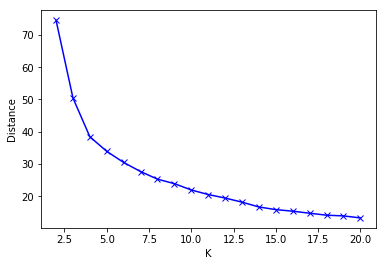

In [37]:
plt.plot(K_values, dist,'bx-')
plt.xlabel('K')
plt.ylabel('Distance')
plt.show()

In [38]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [39]:
df['cluster'] = kmeans.labels_

In [41]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,age,cluster
0,14.0,8,350.0,165.0,4209.0,12.0,47,1
1,31.9,4,89.0,71.0,1925.0,14.0,39,3
2,17.0,8,302.0,140.0,3449.0,11.0,48,1
3,15.0,8,400.0,150.0,3761.0,11.0,48,1
4,30.5,4,98.0,63.0,2051.0,17.0,41,3


<h2>Profilling</h2>

In [42]:
output = df.groupby('cluster').agg(['min', 'max', 'mean', 'median', 'std'])

In [43]:
output

mpg                                    cylinders                \
          min   max       mean median       std        min max      mean   
cluster                                                                    
0        15.0  32.7  20.050909   19.0  3.380821          5   8  6.072727   
1        13.0  23.0  15.068493   14.5  2.072162          8   8  8.000000   
2        18.0  35.0  25.149206   25.0  3.623083          4   4  4.000000   
3        24.3  37.4  32.496923   32.4  3.863409          4   6  4.046154   

                            ...     time-to-60                           \
        median       std    ...            min    max       mean median   
cluster                     ...                                           
0            6  0.503857    ...           11.0  20.25  16.231818   16.0   
1            8  0.000000    ...           11.0  17.00  12.753425   13.0   
2            4  0.000000    ...           12.0  20.25  16.412698   16.0   
3            4  0.275611    ...           13.0  20.25  16.884615   17.0   

                  age                                  
              std min max       mean median       std  
cluster                                                
0        2.113588  36  48  41.963636     42  3.214341  
1        1.460411  39  48  44.178082     45  2.902788  
2        2.057715  40  48  44.333333     44  2.221595  
3        1.918290  36  42  38.000000     38  1.667708  

[4 rows x 35 columns]

In [44]:
output = df.groupby('cluster').agg(['mean'])

In [45]:
output

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,age
,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,
0,20.050909,6.072727,216.545455,101.909091,3199.781818,16.231818,41.963636
1,15.068493,8.000000,347.205479,156.349315,4047.667808,12.753425,44.178082
2,25.149206,4.000000,108.142857,83.333333,2338.849206,16.412698,44.333333
3,32.496923,4.046154,110.769231,74.015385,2297.200000,16.884615,38.000000


<p>If the dataset contain the numerical as well as categorical then we us <b>'KPrototypes'<p>

In [ ]:
from kmodes.kprototypes import KPrototypes

In [ ]:
kp = KPrototypes(n_clusters=3, init='Huang', )
kp.fit(df, categorical=['column_index'])

In [ ]:
kp.cluster_centroids_

In [ ]:
kp.labels_

In [ ]:
df['cluster'] = kp.labels_

In [ ]:
df.groupby('cluster').agg['mean']

In [ ]:
df.groupby('cluster')[' brand'].sum()

In [ ]:
df.groupby('cluster')[' brand'].value_counts()